<a href="https://colab.research.google.com/github/dikoharyadhanto/Pandas-Documentation/blob/main/004-Handling_With_Missing_Values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Link Untuk Mengetahui Gimana caranya mengatasi Missing Values](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html)

# **Inspeksi Missing Value**

Value yang hilang/tidak lengkap dari dataframe akan membuat analisis atau model prediksi yang dibuat menjadi tidak akurat dan mengakibatkan keputusan salah yang diambil. Terdapat beberapa cara untuk mengatasi data yang hilang/tidak lengkap tersebut.

Di pandas data yang hilang umumnya direpresentasikan dengan NaN.

Langkah pertama, harus tahu kolom mana yang terdapat data hilang dan berapa banyak dengan cara:

Cara 1: menerapkan method `.info()` pada dataframe 

In [1]:
import pandas as pd
# Baca file "public data covid19 jhu csse eu.csv"
df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/CHAPTER%204%20-%20missing%20value%20-%20public%20data%20covid19%20.csv")
# Cetak info dari df
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   province_state  960 non-null    object 
 1   country_region  1000 non-null   object 
 2   date            1000 non-null   object 
 3   latitude        874 non-null    float64
 4   longitude       874 non-null    float64
 5   location_geom   874 non-null    object 
 6   confirmed       1000 non-null   int64  
 7   deaths          999 non-null    float64
 8   recovered       999 non-null    float64
 9   active          949 non-null    float64
 10  fips            949 non-null    float64
 11  admin2          842 non-null    object 
 12  combined_key    0 non-null      float64
dtypes: float64(7), int64(1), object(5)
memory usage: 101.7+ KB
None


Cara 2: mengetahui berapa banyak nilai hilang dari tiap kolom di dataset tersebut dengan menerapkan chaining method pada dataframe yaitu `.isna().sum()`. Method `.isna()` digunakan untuk mengecek berapa data yang bernilai NaN dan .sum() menjumlahkannya secara default untuk masing-masing kolom dataframe.

In [2]:
# Cetak jumlah missing value di setiap kolom
mv = df.isna().sum()
print("\nJumlah missing value per kolom:\n", mv)


Jumlah missing value per kolom:
 province_state      40
country_region       0
date                 0
latitude           126
longitude          126
location_geom      126
confirmed            0
deaths               1
recovered            1
active              51
fips                51
admin2             158
combined_key      1000
dtype: int64


Hanya kolom combine_key yang keseluruhan barisnya adalah missing value (1000 buah), sementara kolom country_region, date, dan confirmed tidak memiliki missing value. Untuk kolom lainnya terdapat beragam jumlah missing value. Apa yang dapat dilakukan?

Untuk memahami mana kolom yang akan ditreatment dengan tiga perlakukan di atas lihat nature dari data terlebih dahulu. Contohnya pada kolom death dan recovered jika ada yang missing value maka kemungkinan terbesarnya adalah tidak ada meninggal atau sembuh pada hari tersebut. 

Untuk kolom yang seluruhnya missing yaitu combined_key dapat dibuang saja satu kolom itu karena tidak ada data yang dapat diketahui dari kolom tersebut.

Sementara, kolom yang lainnya bagaimana? Misal ambil kolom province_stat, missing valuenya dapat terjadi bahwa tidak dilaporkan itu berasal dari daerah mana di negara itu. Dapat mengisi misal dengan string 'unknown' karena tahu kolom tersebut bertipe data string.

# **Treatment untuk Missing Value**

Terdapat beberapa cara untuk mengatasi missing value, antara lain:

1. dibiarkan saja,
2.hapus value itu, atau
3. isi value tersebut dengan value yang lain (biasanya interpolasi, mean, median, etc)

Treatment **pertama** (membiarkannya saja) seperti pada kolom confirmed, death, dan recovered. Akan tetapi jika tidak ada yang terkonfirmasi, meninggal dan sembuh sebenarnya dapat menukar value ini dengan angka nol. Meskipun ini lebih make sense dalam representasi datanya, tetapi untuk sub bab ini ketiga kolom tersebut diasumsikan dibiarkan memiliki nilai missing value.

Treatment **kedua** yaitu dengan menghapus kolom, yang mana ini digunakan jika seluruh kolom dari dataset yang dipunyai semua barisnya adalah missing value. Untuk itu dapat menerapkan method `.dropna() `pada dataframe, bagaimana caranya?

In [ ]:
nama_dataframe.dropna(axis=1, how="all")

Pada method `.dropna()` ada dua keyword argumen yang harus diisikan yaitu axis dan how. Keyword axis digunakan untuk menentukan arah dataframe yang akan dibuang angka 1 untuk menyatakan kolom (column-based) atau dapat ditulis dalam string "column". Jika digunakan angka 0 berarti itu dalam searah index (row-based) atau dapat ditulis dalam string "index".

Sementara, keyword how digunakan untuk bagaimana cara membuangnya. Opsi yang dapat diterimanya (dalam string) adalah

- "all" artinya jika seluruh data di satu/beberapa kolom atau di satu/beberapa baris adalah missing value.
- "any" artinya jika memiliki 1 saja data yang hilang maka buanglah baris/kolom tersebut.

In [4]:
import pandas as pd
# Baca file "public data covid19 jhu csse eu.csv"
df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/CHAPTER%204%20-%20missing%20value%20-%20public%20data%20covid19%20.csv")
# Cetak ukuran awal dataframe
print("Ukuran awal df: %d baris, %d kolom." % df.shape)
# Drop kolom yang seluruhnya missing value dan cetak ukurannya
df = df.dropna(axis=1, how="all")
print("Ukuran df setelah buang kolom dengan seluruh data missing: %d baris, %d kolom." % df.shape)
# Drop baris jika ada satu saja data yang missing dan cetak ukurannya
df = df.dropna(axis=0, how="any")
print("Ukuran df setelah dibuang baris yang memiliki sekurangnya 1 missing value: %d baris, %d kolom." % df.shape)

Ukuran awal df: 1000 baris, 13 kolom.
Ukuran df setelah buang kolom dengan seluruh data missing: 1000 baris, 12 kolom.
Ukuran df setelah dibuang baris yang memiliki sekurangnya 1 missing value: 746 baris, 12 kolom.


Sekarang, akan melakukan treatment ketiga untuk menghandle missing value pada dataframe. Treatment ini dilakukan dengan cara mengisi missing value dengan nilai lain, yang dapat berupa :

- nilai statistik seperti mean atau median
- interpolasi data
- text tertentu

Akan mulai pada kolom yang missing yang tipe datanya adalah berupa object. Kolom tersebut adalah province_state, karena tidak tahu secara persis province_state mana yang dimaksud, bisa menempatkan string "unknown" sebagai substitusi missing value. Meskipun keduanya berarti sama-sama tidak tahu tetapi berbeda dalam representasi datanya. 
Untuk melakukan hal demikian dapat menggunakan method `.fillna()` pada kolom dataframe yang dimaksud.

In [5]:
import pandas as pd
# Baca file "public data covid19 jhu csse eu.csv"
df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/CHAPTER%204%20-%20missing%20value%20-%20public%20data%20covid19%20.csv")
# Cetak unique value pada kolom province_state
print("Unique value awal:\n", df["province_state"].unique())
# Ganti missing value dengan string "unknown_province_state"
df["province_state"] = df["province_state"].fillna("unknown_province_state")
# Cetak kembali unique value pada kolom province_state
print("Unique value setelah fillna:\n", df["province_state"].unique())

Unique value awal:
 [nan 'US' 'Guam' 'Iowa']
Unique value setelah fillna:
 ['unknown_province_state' 'US' 'Guam' 'Iowa']


Untuk data-data bertipe numerik, mengganti missing value dengan nilai statistik kolom bersangkutan, baik median atau mean (nilai rata-rata). Misalnya akan menggunakan kolom active. Dengan mengabaikan terlebih dahulu sebaran berdasarkan negara (univariate), jika mengisi dengan nilai rata-rata maka harus melihat terlebih dahulu data apakah memiliki ouliers atau tidak. Jika ada outliers dari data maka menggunakan nilai tengah (median) data adalah cara yang lebih safe.

Untuk itu diputuskan dengan mengecek nilai median dan nilai mean kolom active juga nilai min dan max-nya. Jika data pada kolom active terdistribusi normal maka nilai mean dan median akan hampir sama.

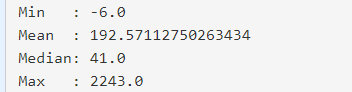

Terlihat data memiliki distribusi yang skewness, karena nilai mean dan median yang cukup jauh serta range data yang cukup lebar. Di sini pada kolom active data memiliki outliers. Jadi akan mengisi missing value dengan median.

In [6]:
import pandas as pd
# Baca file "https://storage.googleapis.com/dqlab-dataset/CHAPTER%204%20-%20missing%20value%20-%20public%20data%20covid19%20.csv"
df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/CHAPTER%204%20-%20missing%20value%20-%20public%20data%20covid19%20.csv")
# Cetak nilai mean dan median awal 
print("Awal: mean = %f, median = %f." % (df["active"].mean(), df["active"].median()))
# Isi missing value kolom active dengan median
df_median = df["active"].fillna(df["active"].median())
# Cetak nilai mean dan median awal setelah diisi dengan median
print("Fillna median: mean = %f, median = %f." % (df_median.mean(), df_median.median()))
# Isi missing value kolom active dengan mean
df_mean = df["active"].fillna(df["active"].mean())
# Cetak nilai mean dan median awal setelah diisi dengan mean
print("Fillna mean: mean = %f, median = %f." % (df_mean.mean(), df_mean.median()))

Awal: mean = 192.571128, median = 41.000000.
Fillna median: mean = 184.841000, median = 41.000000.
Fillna mean: mean = 192.571128, median = 49.000000.


Di bagian ini akan menggunakan teknik interpolasi dalam mengisi nilai missing value pada suatu dataset.

Data yang menggunakan interpolasi untuk mengisi data yang hilang adalah time series data, yang secara default akan diisi dengan interpolasi linear.

In [7]:
import numpy as np
import pandas as pd
# Data
ts = pd.Series({
   "2020-01-01":9,
   "2020-01-02":np.nan,
   "2020-01-05":np.nan,
   "2020-01-07":24,
   "2020-01-10":np.nan,
   "2020-01-12":np.nan,
   "2020-01-15":33,
   "2020-01-17":np.nan,
   "2020-01-16":40,
   "2020-01-20":45,
   "2020-01-22":52,
   "2020-01-25":75,
   "2020-01-28":np.nan,
   "2020-01-30":np.nan
})
# Isi missing value menggunakan interpolasi linier
ts = ts.interpolate()
# Cetak time series setelah interpolasi linier
print("Setelah diisi missing valuenya:\n",ts)

Setelah diisi missing valuenya:
 2020-01-01     9.0
2020-01-02    14.0
2020-01-05    19.0
2020-01-07    24.0
2020-01-10    27.0
2020-01-12    30.0
2020-01-15    33.0
2020-01-17    36.5
2020-01-16    40.0
2020-01-20    45.0
2020-01-22    52.0
2020-01-25    75.0
2020-01-28    75.0
2020-01-30    75.0
dtype: float64
